# Introduction

In this notebook we test different choices of hyperparameters for our double dqn-agent with the objective to optimise the model performance.

This part of the first project: *Navigation* of **Deep Reinforcement Learning for Enterprise** Course in *Udacity*.

## 0 - Importing Packages

Importing all required packages.

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from training_double_dqn_agent import double_dqn

## 1 - Initialising Environment

Initialising Unity environment to analyse.

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2 - Definiting Hyperparameters

Defining a dictionary with all hyperparameters used as inputs in the final tuned DQN-model.

In [4]:
dic = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 0.5,
       'eps_end': 0.01,
       'eps_decay':0.92,
       'fc1_units':32,
       'fc2_units':64,
       'buffer_size': int(2e4),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-3,
       'lr': 1e-4,
       'update_every': 3
      }

## 3 - Training model

### 3.1 - Preliminaries

Defining two useful functions to transform the scores an times results dictionaries into dataframes.

In [8]:
def maxlen(dic):
    l = 0
    for e in dic.values():
        if len(e) > l:
            l = len(e)
    return l

In [9]:
def dic_fix(dic):
    dicF = {}
    ml = maxlen(dic)
    for i , e in enumerate(dic.values()):
        new = [None] * (ml - len(e))
        dicF[i] = e + new
    return dicF

Initialising dictionaries to collect results.

In [10]:
scores_dic = {}
times_dic = {}

### 3.2 - Defining hyperparameter shocks

Creating a dictionary with the rota of the hyperparameter shocks that we will test:
* dictionary keys: name of the scenarios,
* dictionary values: tuple with name of hyperparameter, type of shock - absolute or relative, size of the shock.

In [10]:
shocks_rota = {'max_t +': ('max_t', 'abs', 4000),
              'max_t -': ('max_t', 'abs', 1000),
              'eps_start +': ('eps_start', 'rel', 2.0),
              'eps_start -': ('eps_start', 'rel', 0.5),
              'eps_end +': ('eps_end', 'rel', 2),
              'eps_end -': ('eps_end', 'rel', 0.5),
              'eps_decay +': ('eps_decay', 'abs', 0.999),
              'eps_decay -': ('eps_decay', 'abs', 0.9),
              'fc1_units ++': ('fc1_units', 'abs', 128),
              'fc1_units +': ('fc1_units', 'abs', 64),
              'fc1_units -': ('fc1_units', 'abs', 16),
              'fc2_units +': ('fc2_units', 'abs', 128),
              'fc2_units -': ('fc2_units', 'abs', 32),
              'buffer_size +': ('buffer_size', 'abs', int(1e5)),
              'buffer_size -': ('buffer_size', 'abs', int(1e04)),
              'batch_size +': ('batch_size', 'abs', 128),
              'batch_size -': ('batch_size', 'abs', 32),
              'gamma +': ('gamma', 'abs', 0.9999),
              'gamma -': ('gamma', 'abs', 0.9),
              'tau +': ('tau', 'abs', 1e-2),
              'tau -': ('tau', 'abs', 1e-4),
              'lr +': ('lr', 'abs', 1e-3),
              'lr -': ('lr', 'abs', 1e-5),
              'update_every +': ('update_every', 'abs', 6),
              'update_every -': ('update_every', 'abs', 2)
             }

### 3.3 - Training loop

Looping through the shocks defined in the shocks rota.

In [11]:
for k, v in shocks_rota.items():
    print('Applying shock:\t' + k)
    dic_shocked = dic.copy()
    if v[1] == 'rel':
        dic_shocked[v[0]] = dic[v[0]] * v[2]
    else:
        dic_shocked[v[0]] = v[2]
        
    scores, times = double_dqn(env, dic_shocked)
    
    scores_dic[k] = scores
    times_dic[k] = times

Applying shock:	max_t +
Episode 100	Average Score: 4.47	Time Split: 74.39			 
Episode 200	Average Score: 10.25	Time Split: 71.60			 
Episode 300	Average Score: 11.99	Time Split: 71.28			 
Episode 343	Average Score: 13.01	Time Elapsed: 248.13
Environment solved in 243 episodes!	Average Score: 13.01	Time Elapsed: 248.13
Applying shock:	max_t -
Episode 100	Average Score: 1.26	Time Split: 71.68			 
Episode 200	Average Score: 7.49	Time Split: 74.03			 
Episode 300	Average Score: 11.62	Time Split: 73.33			 
Episode 354	Average Score: 13.13	Time Elapsed: 258.46
Environment solved in 254 episodes!	Average Score: 13.13	Time Elapsed: 258.46
Applying shock:	eps_start +
Episode 100	Average Score: -0.22	Time Split: 71.19			 
Episode 200	Average Score: -0.07	Time Split: 70.99			 
Episode 300	Average Score: 3.49	Time Split: 71.49			 
Episode 400	Average Score: 9.48	Time Split: 72.10			 
Episode 476	Average Score: 13.00	Time Elapsed: 340.80
Environment solved in 376 episodes!	Average Score: 13.00	Time

### 3.3 - Storing data

Making dictionaries all same size.

In [17]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)

Passing them on to a DataFrame structure.

In [18]:
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)

Storing the DataFrames into csv files for analysis in the next section.

In [16]:
scores_df.to_csv('scores_DDQN_hyp_analysis.csv')
times_df.to_csv('times_DDQN_hyp_analysis.csv')

## 4 - Analysing the data

### 4.1 - Loading the data

In [19]:
scores_df = pd.read_csv('scores_DDQN_hyp_analysis.csv', index_col=0)
times_df = pd.read_csv('times_DDQN_hyp_analysis.csv', index_col=0)

In [20]:
columns_names = {str(i): k for i,k in enumerate(shocks_rota.keys())}

In [21]:
scores_df.rename(columns=columns_names, inplace=True)
times_df.rename(columns=columns_names, inplace=True)

### 4.2 - Analysing time

In this section we analyse the distribution of amount of time taken to train the model to succeed for the different hyperparameter shocks.

In [22]:
total_times = times_df.sum()

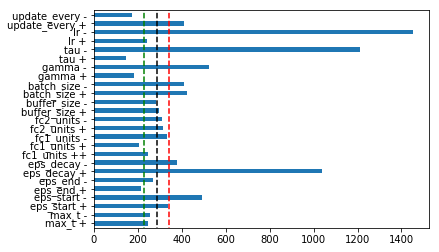

In [26]:
ax = total_times.plot.barh()
ax.vlines(285, ymin = -2, ymax=25, linestyles='dashed', label='baseline', colors='k')
ax.vlines(230, ymin = -2, ymax=25, linestyles='dashed', label='baseline', colors='g')
ax.vlines(340, ymin = -2, ymax=25, linestyles='dashed', label='baseline', colors='r')

In [27]:
total_times[total_times < 230]

eps_end +         212.916426
fc1_units +       204.831784
gamma +           180.302035
tau +             143.698815
update_every -    173.985795
dtype: float64

Shocks that performed statistically significantly better - to a standard deviation - under "learning time" measure were:
* larger tau
* update more frequently
* larger discounting
* more units in the first deep layer
* larger epsilon floor

also of some significance,
* larger learning rate
* larger starting epsilon

### 4.3 - Analysing total number of episodes

In this section we anlyse the total number of episodes required to achieve success for the different shocks.

In [28]:
total_episodes = scores_df.count() - 100

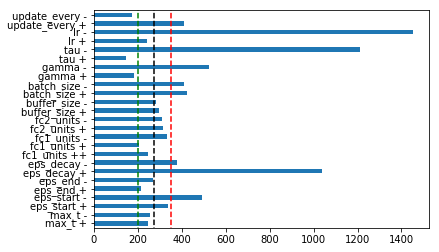

In [30]:
ax = total_times.plot.barh()
ax.vlines(200, ymin = -2, ymax=25, linestyles='dashed', label='baseline', colors='g')
ax.vlines(275, ymin = -2, ymax=25, linestyles='dashed', label='baseline', colors='k')
ax.vlines(350, ymin = -2, ymax=25, linestyles='dashed', label='baseline', colors='r')

In [31]:
total_episodes[total_episodes < 200]

eps_end +         198
fc1_units +       182
gamma +           146
tau +              96
update_every -    113
dtype: int64

Shocks that performed statistically significantly better - to a standard deviation - under "total number of episodes" measure were:
* larger tau
* more frequent update
* larger gamma
* more units on the first hidden layer
* larger epsilon floor

also,
* larger learning rate
* larger initial epsilon 

### 4.2 - Visualising the rolling scores

In [32]:
rolling = scores_df.rolling(100).mean()

In [33]:
rolling_vol = scores_df.rolling(100).std()

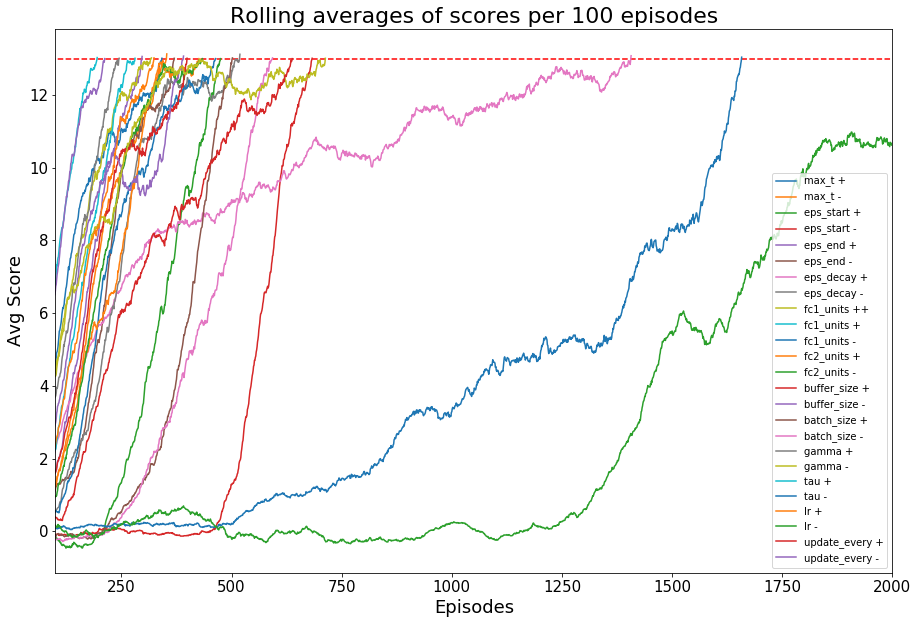

In [40]:
ax = rolling.plot(xlim=(100,2000), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.hlines(13, xmin = -2, xmax=2000, linestyles='dashed', label='goal', colors='r')
ax.figure.savefig("RollAvgDDQNHyp.png")


Text(0.5, 1.0, 'Rolling volatility of scores per 100 episodes')

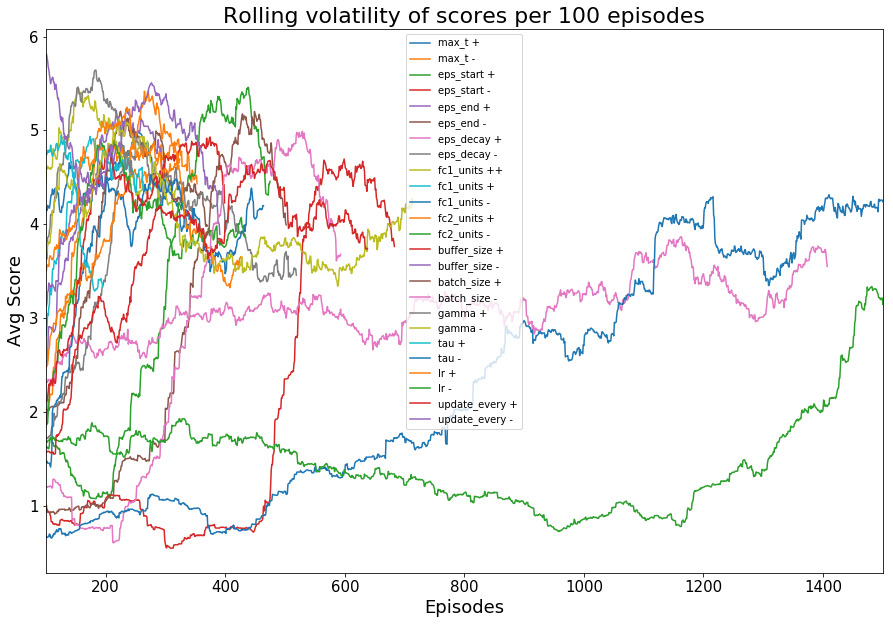

In [41]:
ax = rolling_vol.plot(xlim=(100,1500), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling volatility of scores per 100 episodes", fontsize=22)

## 5 - Further hyperparameter testing

We will used the optimal values found in the different shocks altogether to define a new hyperparameter dictionary to feed the model.

dic2 = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 1,
       'eps_end': 0.02,
       'eps_decay':0.92,
       'fc1_units':64,
       'fc2_units':64,
       'buffer_size': int(2e4),
       'batch_size': 64,
       'gamma':0.9999,
       'tau': 1e-2,
       'lr': 1e-3,
       'update_every': 2
      }

In [7]:
dic2 = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 0.5,
       'eps_end': 0.01,
       'eps_decay':0.92,
       'fc1_units':32,
       'fc2_units':64,
       'buffer_size': int(2e4),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-2,
       'lr': 1e-4,
       'update_every': 3
      }

### 5.1 - Defining new shocks

We will continue our analysis in the directions where the performance of the model improved in terms of fewer number of episodes required to achieve success:
* smaller starting epsilon number
* smaller epsilon floor
* more first hidden layer units
* higher learning rate
* more frequent network update
* higher gamma
* higher tau

In [8]:
shocks_rota_2 = {'base': ('max_t', 'abs', 1000),
               
              'eps_start ++': ('eps_start', 'abs', 1.0),
              'eps_start +': ('eps_start', 'abs', 0.75),
              'eps_start -': ('eps_start', 'abs', 0.4),
              
              'eps_end ++': ('eps_end', 'abs', 0.04),
              'eps_end +': ('eps_end', 'abs', 0.02),
              'eps_end -': ('eps_end', 'abs', 0.005),
               
              'fc1_units ++': ('fc1_units', 'abs', 64),
              'fc1_units +': ('fc1_units', 'abs', 48),
               
              'lr ++': ('lr', 'abs', 1e-3),
              'lr +': ('lr', 'abs', 5e-4),
              'lr -': ('lr', 'abs', 5e-5),
               
              'update_every -': ('update_every', 'abs', 2),
              'update_every --': ('update_every', 'abs', 1),
                 
              'tau +': ('tau', 'abs', 1e-1),
              'tau -': ('tau', 'abs', 5e-3),
                 
              'gamma ++': ('gamma', 'abs', 1),
              'gamma +': ('gamma', 'abs', 0.9999),
              'gamma -': ('gamma', 'abs', 0.9)
              
                 
                 }

### 5.2 - Training loop

In [9]:
for k, v in shocks_rota_2.items():
    print('Applying shock:\t' + k)
    dic_shocked = dic2.copy()
    if v[1] == 'rel':
        dic_shocked[v[0]] = dic2[v[0]] * v[2]
    else:
        dic_shocked[v[0]] = v[2]
        
    scores, times = double_dqn(env, dic_shocked)
    
    scores_dic[k] = scores
    times_dic[k] = times

Applying shock:	base
Episode 100	Average Score: 8.82	Time Split: 70.78			 
Episode 158	Average Score: 13.02	Time Elapsed: 111.92
Environment solved in 58 episodes!	Average Score: 13.02	Time Elapsed: 111.92
Applying shock:	eps_start ++
Episode 100	Average Score: 6.45	Time Split: 70.69			 
Episode 200	Average Score: 12.78	Time Split: 71.16			 
Episode 271	Average Score: 13.00	Time Elapsed: 192.24
Environment solved in 171 episodes!	Average Score: 13.00	Time Elapsed: 192.24
Applying shock:	eps_start +
Episode 100	Average Score: 8.21	Time Split: 70.71			 
Episode 200	Average Score: 12.59	Time Split: 71.14			 
Episode 300	Average Score: 12.04	Time Split: 71.25			 
Episode 384	Average Score: 13.02	Time Elapsed: 272.85
Environment solved in 284 episodes!	Average Score: 13.02	Time Elapsed: 272.85
Applying shock:	eps_start -
Episode 100	Average Score: 0.17	Time Split: 70.79			 
Episode 200	Average Score: 1.29	Time Split: 72.67			 
Episode 300	Average Score: 10.17	Time Split: 71.66			 
Episode 4

### 5.3 - Saving results

In [10]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_ddqn_hyperparameters_second_analysis.csv')
times_df.to_csv('times_ddqn_hyperparameters_second_analysis.csv')

### 5.4 - Loanding results

In [38]:
scores_df = pd.read_csv('scores_ddqn_hyperparameters_second_analysis.csv', index_col=0)
times_df = pd.read_csv('times_ddqn_hyperparameters_second_analysis.csv', index_col=0)

In [39]:
columns_names = {str(i): k for i,k in enumerate(shocks_rota_2.keys())}

In [40]:
scores_df.rename(columns=columns_names, inplace=True)
times_df.rename(columns=columns_names, inplace=True)

### 5.5 - Visualising results

In [41]:
rolling = scores_df.rolling(100).mean()

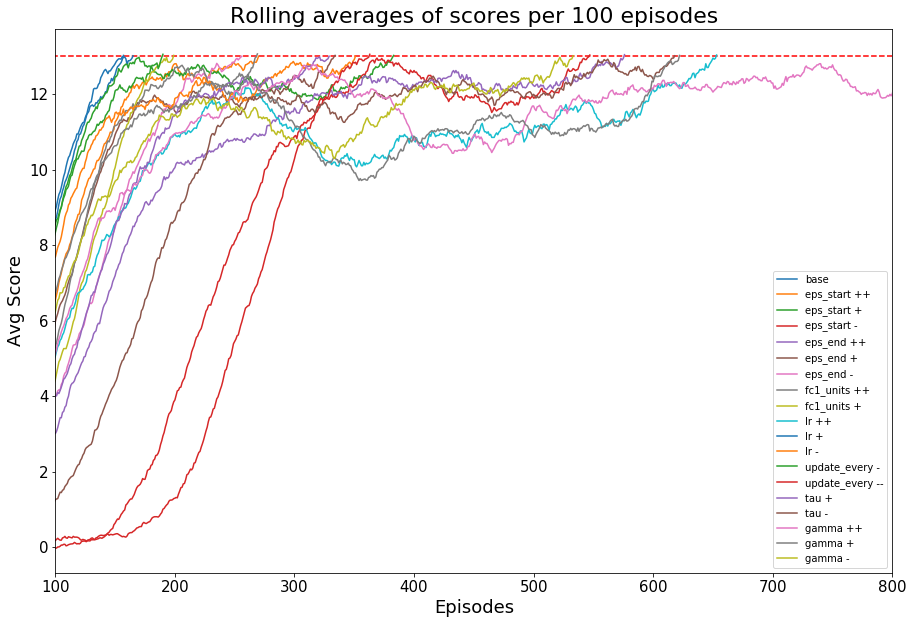

In [42]:
ax = rolling.plot(xlim=(100,800), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.figure.savefig("RollAvgDDQNHyp2.png")
ax.hlines(13, xmin = -2, xmax=2000, linestyles='dashed', label='goal', colors='r')

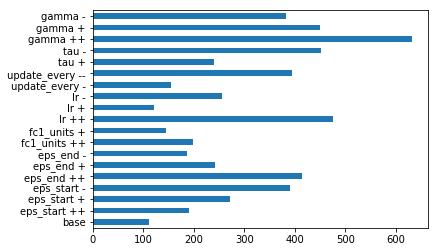

In [43]:
times_df.sum().plot.barh()

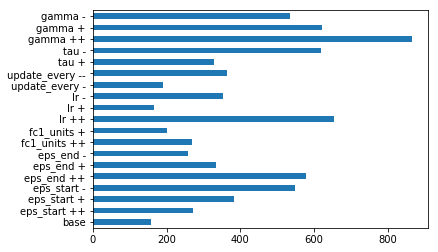

In [44]:
scores_df.count().plot.barh()

Base had a quite hight performance. We will still investigate further after having a better idea of the base performance distribution and pick then the shocks in the direction that improve results if they were statistically sgnificant to base. Especially the following ones:
* update every increase,
* learning rate increase,
* first hidden layer units increase,
* epsilon floor decrease

Base will be our hyperparameters setting for our final setup.

## 6 - Final setup analysis

We will load the hyperparameters for our final setup.

In [19]:
dic_final = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 0.5,
       'eps_end': 0.01,
       'eps_decay':0.92,
       'fc1_units':32,
       'fc2_units':64,
       'buffer_size': int(2e4),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-2,
       'lr': 1e-4,
       'update_every': 3
      }

And collect training data to analyse the final setup performace statistics.

In [21]:
for i in range(250):
    print('Test number:\t' + str(i))
    scores, times = double_dqn(env, dic_final)
    scores_dic[i] = scores
    times_dic[i] = times

Test number:	0
Episode 100	Average Score: 5.45	Time Split: 72.78			 
Episode 200	Average Score: 12.93	Time Split: 72.92			 
Episode 300	Average Score: 11.03	Time Split: 73.04			 
Episode 361	Average Score: 13.07	Time Elapsed: 263.80
Environment solved in 261 episodes!	Average Score: 13.07	Time Elapsed: 263.80
Test number:	1
Episode 100	Average Score: 7.17	Time Split: 73.70			 
Episode 174	Average Score: 13.05	Time Elapsed: 127.99
Environment solved in 74 episodes!	Average Score: 13.05	Time Elapsed: 127.99
Test number:	2
Episode 100	Average Score: 7.12	Time Split: 73.21			 
Episode 169	Average Score: 13.01	Time Elapsed: 123.84
Environment solved in 69 episodes!	Average Score: 13.01	Time Elapsed: 123.84
Test number:	3
Episode 100	Average Score: 7.98	Time Split: 73.37			 
Episode 200	Average Score: 12.57	Time Split: 73.91			 
Episode 230	Average Score: 13.05	Time Elapsed: 169.39
Environment solved in 130 episodes!	Average Score: 13.05	Time Elapsed: 169.39
Test number:	4
Episode 100	Averag

Episode 230	Average Score: 13.03	Time Elapsed: 171.37
Environment solved in 130 episodes!	Average Score: 13.03	Time Elapsed: 171.37
Test number:	28
Episode 100	Average Score: 7.98	Time Split: 74.17			 
Episode 194	Average Score: 13.06	Time Elapsed: 144.23
Environment solved in 94 episodes!	Average Score: 13.06	Time Elapsed: 144.23
Test number:	29
Episode 100	Average Score: 6.34	Time Split: 74.11			 
Episode 200	Average Score: 12.07	Time Split: 77.93			 
Episode 300	Average Score: 12.34	Time Split: 74.90			 
Episode 400	Average Score: 12.07	Time Split: 75.29			 
Episode 500	Average Score: 11.73	Time Split: 74.89			 
Episode 600	Average Score: 12.51	Time Split: 74.99			 
Episode 700	Average Score: 12.72	Time Split: 74.74			 
Episode 716	Average Score: 13.05	Time Elapsed: 538.76
Environment solved in 616 episodes!	Average Score: 13.05	Time Elapsed: 538.76
Test number:	30
Episode 100	Average Score: 4.00	Time Split: 74.27			 
Episode 197	Average Score: 13.05	Time Elapsed: 146.77
Environment

Episode 100	Average Score: 4.09	Time Split: 78.90			 
Episode 200	Average Score: 11.59	Time Split: 79.07			 
Episode 265	Average Score: 13.02	Time Elapsed: 209.53
Environment solved in 165 episodes!	Average Score: 13.02	Time Elapsed: 209.53
Test number:	57
Episode 100	Average Score: 4.72	Time Split: 78.84			 
Episode 200	Average Score: 11.71	Time Split: 79.20			 
Episode 300	Average Score: 12.38	Time Split: 79.11			 
Episode 400	Average Score: 12.76	Time Split: 80.82			 
Episode 500	Average Score: 12.90	Time Split: 79.28			 
Episode 534	Average Score: 13.03	Time Elapsed: 424.17
Environment solved in 434 episodes!	Average Score: 13.03	Time Elapsed: 424.17
Test number:	58
Episode 100	Average Score: 4.85	Time Split: 78.46			 
Episode 200	Average Score: 12.68	Time Split: 79.10			 
Episode 300	Average Score: 12.84	Time Split: 79.40			 
Episode 306	Average Score: 13.02	Time Elapsed: 241.72
Environment solved in 206 episodes!	Average Score: 13.02	Time Elapsed: 241.72
Test number:	59
Episode 1

Episode 600	Average Score: 12.25	Time Split: 79.49			 
Episode 648	Average Score: 13.07	Time Elapsed: 514.23
Environment solved in 548 episodes!	Average Score: 13.07	Time Elapsed: 514.23
Test number:	113
Episode 100	Average Score: 1.22	Time Split: 78.81			 
Episode 200	Average Score: 4.08	Time Split: 79.42			 
Episode 300	Average Score: 10.85	Time Split: 83.95			 
Episode 354	Average Score: 13.00	Time Elapsed: 288.35
Environment solved in 254 episodes!	Average Score: 13.00	Time Elapsed: 288.35
Test number:	114
Episode 100	Average Score: 8.88	Time Split: 85.89			 
Episode 152	Average Score: 13.02	Time Elapsed: 130.22
Environment solved in 52 episodes!	Average Score: 13.02	Time Elapsed: 130.22
Test number:	115
Episode 100	Average Score: 1.64	Time Split: 85.21			 
Episode 200	Average Score: 9.95	Time Split: 85.58			 
Episode 300	Average Score: 12.60	Time Split: 85.62			 
Episode 321	Average Score: 13.02	Time Elapsed: 274.42
Environment solved in 221 episodes!	Average Score: 13.02	Time Ela

Episode 300	Average Score: 12.40	Time Split: 85.47			 
Episode 349	Average Score: 13.05	Time Elapsed: 297.94
Environment solved in 249 episodes!	Average Score: 13.05	Time Elapsed: 297.94
Test number:	171
Episode 100	Average Score: 8.26	Time Split: 85.17			 
Episode 200	Average Score: 12.87	Time Split: 85.87			 
Episode 249	Average Score: 13.01	Time Elapsed: 212.87
Environment solved in 149 episodes!	Average Score: 13.01	Time Elapsed: 212.87
Test number:	172
Episode 100	Average Score: 4.49	Time Split: 85.13			 
Episode 200	Average Score: 11.93	Time Split: 85.68			 
Episode 258	Average Score: 13.04	Time Elapsed: 220.54
Environment solved in 158 episodes!	Average Score: 13.04	Time Elapsed: 220.54
Test number:	173
Episode 100	Average Score: 4.92	Time Split: 85.27			 
Episode 175	Average Score: 13.03	Time Elapsed: 149.42
Environment solved in 75 episodes!	Average Score: 13.03	Time Elapsed: 149.42
Test number:	174
Episode 100	Average Score: 3.59	Time Split: 85.04			 
Episode 200	Average Scor

Episode 100	Average Score: 5.81	Time Split: 85.20			 
Episode 200	Average Score: 12.06	Time Split: 85.26			 
Episode 226	Average Score: 13.01	Time Elapsed: 192.65
Environment solved in 126 episodes!	Average Score: 13.01	Time Elapsed: 192.65
Test number:	233
Episode 100	Average Score: 2.41	Time Split: 85.22			 
Episode 200	Average Score: 11.18	Time Split: 85.54			 
Episode 300	Average Score: 12.56	Time Split: 85.47			 
Episode 389	Average Score: 13.01	Time Elapsed: 332.35
Environment solved in 289 episodes!	Average Score: 13.01	Time Elapsed: 332.35
Test number:	234
Episode 100	Average Score: 9.02	Time Split: 85.09			 
Episode 200	Average Score: 12.73	Time Split: 85.66			 
Episode 228	Average Score: 13.04	Time Elapsed: 194.75
Environment solved in 128 episodes!	Average Score: 13.04	Time Elapsed: 194.75
Test number:	235
Episode 100	Average Score: 6.95	Time Split: 84.96			 
Episode 200	Average Score: 12.87	Time Split: 85.49			 
Episode 211	Average Score: 13.01	Time Elapsed: 179.84
Environm

Saving the data.

In [22]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_final_ddqn_analysis.csv')
times_df.to_csv('times_final_ddqn_analysis.csv')


Loading the data.

In [51]:
scores_df = pd.read_csv('scores_final_ddqn_analysis.csv', index_col=0)
times_df = pd.read_csv('times_final_ddqn_analysis.csv', index_col=0)

Analysing the distribution of training time.

In [52]:
total_times = times_df.sum()
total_times.describe()

count      269.000000
mean       408.572076
std       2855.329238
min        111.238119
25%        155.121080
50%        206.123866
75%        279.500591
max      47032.068281
dtype: float64

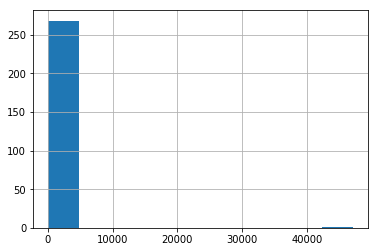

In [53]:
total_times.hist(bins=10)

In [54]:
total_times.skew()

16.36597123070429

In [27]:
total_times.kurt()

268.22439898389337

There was some problem in some runs with the time keeping so averages, standard deviation are not reliable. But in terms of median we have reduced to **206** seconds and quartile-wise we have around **50** seconds of dispertion.

Analysing the distribution of total number of episodes.

In [55]:
total_episodes = scores_df.count() - 100
total_episodes.describe()

count    269.000000
mean     202.193309
std      132.530818
min       46.000000
25%      101.000000
50%      165.000000
75%      261.000000
max      765.000000
dtype: float64

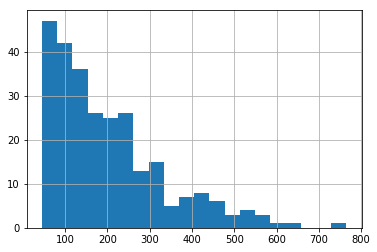

In [56]:
total_episodes.hist(bins=20)

Improved performance at **200 episodes** needed on average but higher dispersion with **135 episodes** of standard deviation.

In [35]:
total_episodes.kurt()

1.5050046633975804

In [36]:
total_episodes.skew()

1.2771410975893687

Positive skew and normalised kurtosis.

Analysing the rolling averages dynamics.

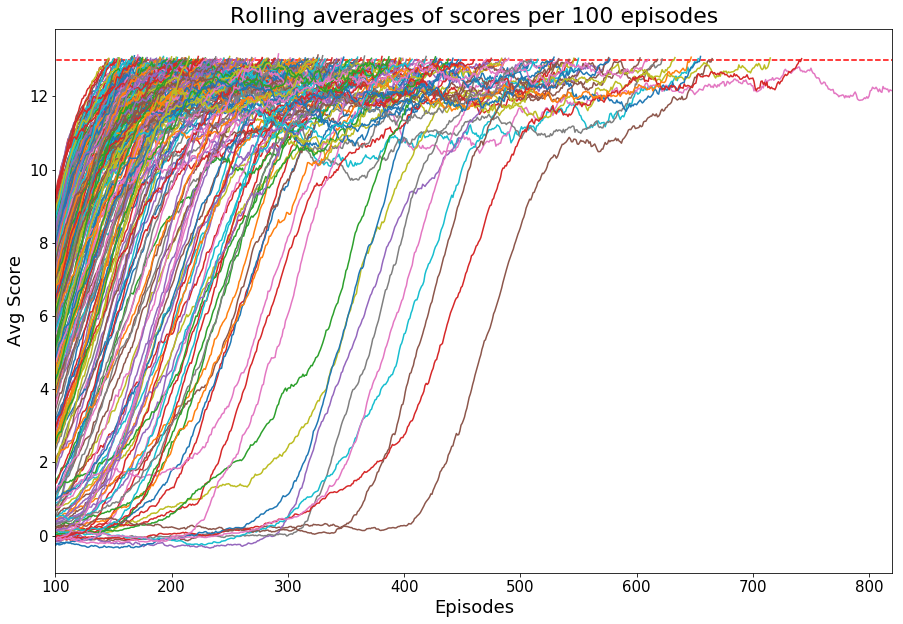

In [65]:
rolling = scores_df.rolling(100).mean()
ax = rolling.plot(legend=None, xlim=(100,820), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.figure.savefig("RollAvgDDQNFinal.png")
ax.hlines(13, xmin = -2, xmax=2000, linestyles='dashed', label='goal', colors='r')
#ax.plot(rolling.mean(axis=1), c='r', label='mean',linewidth=7.0)

## A - Appendix

With better understanding of the performance distribution for the final model, we explore further by only chosing to apply the two statistically significan shocks,
* learning rate: $5\times 10^{-4}$
* increase the frequence of update to 2.

dic_final = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 0.5,
       'eps_end': 0.01,
       'eps_decay':0.92,
       'fc1_units':32,
       'fc2_units':64,
       'buffer_size': int(2e4),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-2,
       'lr': 1e-4,
       'update_every': 3
      }

In [11]:
dic_previous_base = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 0.5,
       'eps_end': 0.01,
       'eps_decay':0.92,
       'fc1_units':32,
       'fc2_units':64,
       'buffer_size': int(2e4),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-2,
       'lr': 5e-4,
       'update_every': 2
      }

In [12]:
for i in range(100):
    print('Test number:\t' + str(i))
    scores, times = double_dqn(env, dic_previous_base)
    scores_dic[i] = scores
    times_dic[i] = times

Test number:	0
Episode 100	Average Score: 6.57	Time Split: 84.85			 
Episode 200	Average Score: 11.53	Time Split: 82.52			 
Episode 300	Average Score: 12.45	Time Split: 83.26			 
Episode 400	Average Score: 12.13	Time Split: 83.55			 
Episode 465	Average Score: 13.03	Time Elapsed: 388.27
Environment solved in 365 episodes!	Average Score: 13.03	Time Elapsed: 388.27
Test number:	1
Episode 100	Average Score: 7.79	Time Split: 84.17			 
Episode 200	Average Score: 10.17	Time Split: 83.19			 
Episode 300	Average Score: 11.51	Time Split: 83.09			 
Episode 354	Average Score: 13.01	Time Elapsed: 295.88
Environment solved in 254 episodes!	Average Score: 13.01	Time Elapsed: 295.88
Test number:	2
Episode 100	Average Score: 9.50	Time Split: 83.23			 
Episode 200	Average Score: 12.34	Time Split: 83.60			 
Episode 300	Average Score: 11.55	Time Split: 83.11			 
Episode 400	Average Score: 12.57	Time Split: 83.50			 
Episode 479	Average Score: 13.05	Time Elapsed: 399.33
Environment solved in 379 episodes!

Episode 500	Average Score: 12.87	Time Split: 83.39			 
Episode 600	Average Score: 12.44	Time Split: 83.40			 
Episode 700	Average Score: 12.99	Time Split: 83.36			 
Episode 701	Average Score: 13.00	Time Elapsed: 583.51
Environment solved in 601 episodes!	Average Score: 13.00	Time Elapsed: 583.52
Test number:	29
Episode 100	Average Score: 8.21	Time Split: 82.94			 
Episode 200	Average Score: 12.89	Time Split: 83.29			 
Episode 207	Average Score: 13.02	Time Elapsed: 172.05
Environment solved in 107 episodes!	Average Score: 13.02	Time Elapsed: 172.05
Test number:	30
Episode 100	Average Score: 8.19	Time Split: 82.69			 
Episode 200	Average Score: 11.91	Time Split: 83.24			 
Episode 300	Average Score: 11.99	Time Split: 83.08			 
Episode 400	Average Score: 12.81	Time Split: 83.36			 
Episode 418	Average Score: 13.07	Time Elapsed: 347.34
Environment solved in 318 episodes!	Average Score: 13.07	Time Elapsed: 347.34
Test number:	31
Episode 100	Average Score: 9.37	Time Split: 82.86			 
Episode 1

Episode 100	Average Score: 9.03	Time Split: 84.47			 
Episode 200	Average Score: 11.69	Time Split: 85.11			 
Episode 300	Average Score: 12.80	Time Split: 85.02			 
Episode 329	Average Score: 13.02	Time Elapsed: 279.25
Environment solved in 229 episodes!	Average Score: 13.02	Time Elapsed: 279.25
Test number:	58
Episode 100	Average Score: 0.67	Time Split: 84.19			 
Episode 200	Average Score: 10.27	Time Split: 84.76			 
Episode 270	Average Score: 13.03	Time Elapsed: 228.14
Environment solved in 170 episodes!	Average Score: 13.03	Time Elapsed: 228.14
Test number:	59
Episode 100	Average Score: 6.90	Time Split: 84.09			 
Episode 200	Average Score: 12.43	Time Split: 84.82			 
Episode 235	Average Score: 13.04	Time Elapsed: 198.57
Environment solved in 135 episodes!	Average Score: 13.04	Time Elapsed: 198.57
Test number:	60
Episode 100	Average Score: 8.52	Time Split: 84.30			 
Episode 197	Average Score: 13.01	Time Elapsed: 166.60
Environment solved in 97 episodes!	Average Score: 13.01	Time Elaps

Episode 100	Average Score: 4.09	Time Split: 87.20			 
Episode 200	Average Score: 11.24	Time Split: 88.04			 
Episode 300	Average Score: 12.48	Time Split: 87.97			 
Episode 339	Average Score: 13.03	Time Elapsed: 297.59
Environment solved in 239 episodes!	Average Score: 13.03	Time Elapsed: 297.59
Test number:	89
Episode 100	Average Score: 8.38	Time Split: 87.26			 
Episode 200	Average Score: 12.78	Time Split: 87.83			 
Episode 300	Average Score: 12.71	Time Split: 87.78			 
Episode 320	Average Score: 13.00	Time Elapsed: 280.44
Environment solved in 220 episodes!	Average Score: 13.00	Time Elapsed: 280.44
Test number:	90
Episode 100	Average Score: 9.53	Time Split: 89.17			 
Episode 156	Average Score: 13.07	Time Elapsed: 138.46
Environment solved in 56 episodes!	Average Score: 13.07	Time Elapsed: 138.46
Test number:	91
Episode 100	Average Score: 9.32	Time Split: 87.13			 
Episode 192	Average Score: 13.01	Time Elapsed: 167.86
Environment solved in 92 episodes!	Average Score: 13.01	Time Elapse

In [14]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_appendix_ddqn_analysis.csv')
times_df.to_csv('times_appendix_ddqn_analysis.csv')

In [15]:
scores_df = pd.read_csv('scores_appendix_ddqn_analysis.csv', index_col=0)

In [16]:
total_episodes = scores_df.count() - 100
total_episodes.describe()

count    100.000000
mean     193.160000
std      110.399341
min       56.000000
25%      113.750000
50%      168.500000
75%      239.000000
max      601.000000
dtype: float64

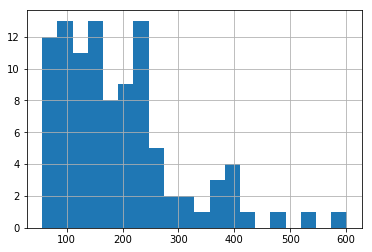

In [18]:
total_episodes.hist(bins=20)

There is further improvement in terms of mean now below 200 at **193 episodes** and standard deviation reduction to **110 episodes**.

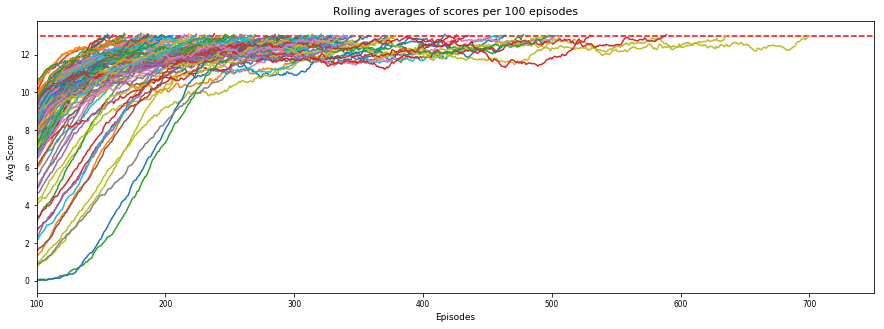

In [22]:
rolling = scores_df.rolling(100).mean()
ax = rolling.plot(legend=None, xlim=(100,750), figsize=(15, 5), fontsize=7.5)
ax.set_xlabel("Episodes", fontsize=9)
ax.set_ylabel("Avg Score", fontsize=9)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=11)
ax.figure.savefig("RollAvgDDQNAppendix.png")
ax.hlines(13, xmin = -2, xmax=2000, linestyles='dashed', label='goal', colors='r')

In [23]:
env.close()